The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


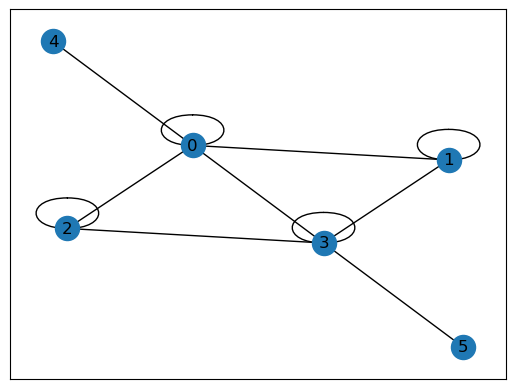

tensor([[ 0.,  1.],
        [ 0.,  1.],
        [ 0.,  1.],
        [ 0.,  1.],
        [-1.,  0.],
        [-1.,  0.]]) tensor([[0.0000],
        [0.8480],
        [0.5300],
        [1.0000],
        [0.0000],
        [0.8480],
        [0.0000],
        [0.5300],
        [0.5300],
        [0.0000],
        [0.8480],
        [1.0000],
        [0.5300],
        [0.8480],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]]) tensor([[0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 5],
        [0, 1, 2, 3, 4, 0, 1, 3, 0, 2, 3, 0, 1, 2, 3, 5, 0, 3]]) [False False False False  True False]
TAKING ACTIONS: {<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7f9a8b02af50>: 0, <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7f9a8b029f90>: 2}
TAKING ACTIONS: {<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7f9a8b02af50>: 0, <patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7f9a8b029f90>: 2}
TAKING ACTIONS: {<patrolling_zoo.env.patrolli

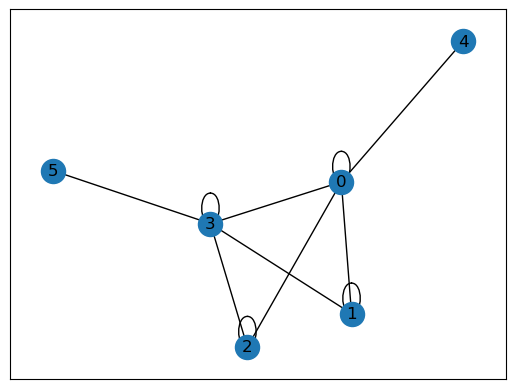

tensor([[ 0.0000,  0.0000],
        [ 0.0000,  1.0000],
        [ 0.0000,  0.3333],
        [ 0.0000,  0.0000],
        [-1.0000,  0.0000],
        [-1.0000,  0.0000]]) tensor([[0.0000],
        [0.8480],
        [0.5300],
        [1.0000],
        [0.0000],
        [0.8480],
        [0.0000],
        [0.5300],
        [0.5300],
        [0.0000],
        [0.8480],
        [1.0000],
        [0.5300],
        [0.8480],
        [0.0000],
        [0.0000],
        [0.0000],
        [0.0000]]) tensor([[0, 0, 0, 0, 0, 1, 1, 1, 2, 2, 2, 3, 3, 3, 3, 3, 4, 5],
        [0, 1, 2, 3, 4, 0, 1, 3, 0, 2, 3, 0, 1, 2, 3, 5, 0, 3]]) [False False False False  True False]


In [2]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel
import numpy as np
import networkx as nx
from torch_geometric.utils import to_networkx
import matplotlib.pyplot as plt

patrolGraph = PatrolGraph("patrolling_zoo/env/4nodes.graph")
env = parallel_env(patrolGraph, 2,
                   speed = 50.0,
                   observation_radius=100,
                   observe_method="pyg",
                   observe_bitmap_dims = (40, 40),
                   require_explicit_visit=True
)

# observations, infos = env.reset(seed=42)

obs = env.observe(env.agents[0])[0]

g = to_networkx(obs, to_undirected=True)
nx.draw_networkx(g)
plt.show()
print(obs.x, obs.edge_attr, obs.edge_index, obs.agent_mask)

for i in range(3):
    # actions = {agent: np.random.choice(len(env.pg.graph.nodes)) for agent in env.agents}
    actions = {
        env.agents[0]: 0,
        env.agents[1]: np.random.choice(len(env.pg.graph.nodes))

    }
    print(f"TAKING ACTIONS: {actions}")
    env.step(actions)

obs = env.observe(env.agents[0])[0]
g = to_networkx(obs, to_undirected=True)
nx.draw_networkx(g)
plt.show()
print(obs.x, obs.edge_attr, obs.edge_index, obs.agent_mask)

# print(observations)
# nx.draw_networkx(patrolGraph.graph)
# # Display the env.state() bitmap using matplotlib.
# import matplotlib.pyplot as plt
# import numpy as np

# state = env.state()
# bitmap = state

# graphLayer = bitmap[:,:,2]
# graphNodes = graphLayer[np.where(graphLayer >= 0)]
# print(f"Sum of node layer: {np.sum(graphNodes)}")
# print(f"Expected sum of node layer: {sum(list(range(len(patrolGraph.graph.nodes))))}")

# agentLayer = bitmap[:,:,0]
# agents = agentLayer[np.where(agentLayer >= 0)]

# bitmap = env._minMaxNormalize(bitmap, a=0, b=255)
# bitmap[np.where(graphLayer >= 0)] = 255
# bitmap[np.where(agentLayer >= 0)] = 0
# plt.imshow(bitmap, aspect="equal")

[0, 1, 2, 3] [(0, 0), (0, 1), (0, 2), (0, 3), (1, 1), (1, 3), (2, 2), (2, 3), (3, 3)]


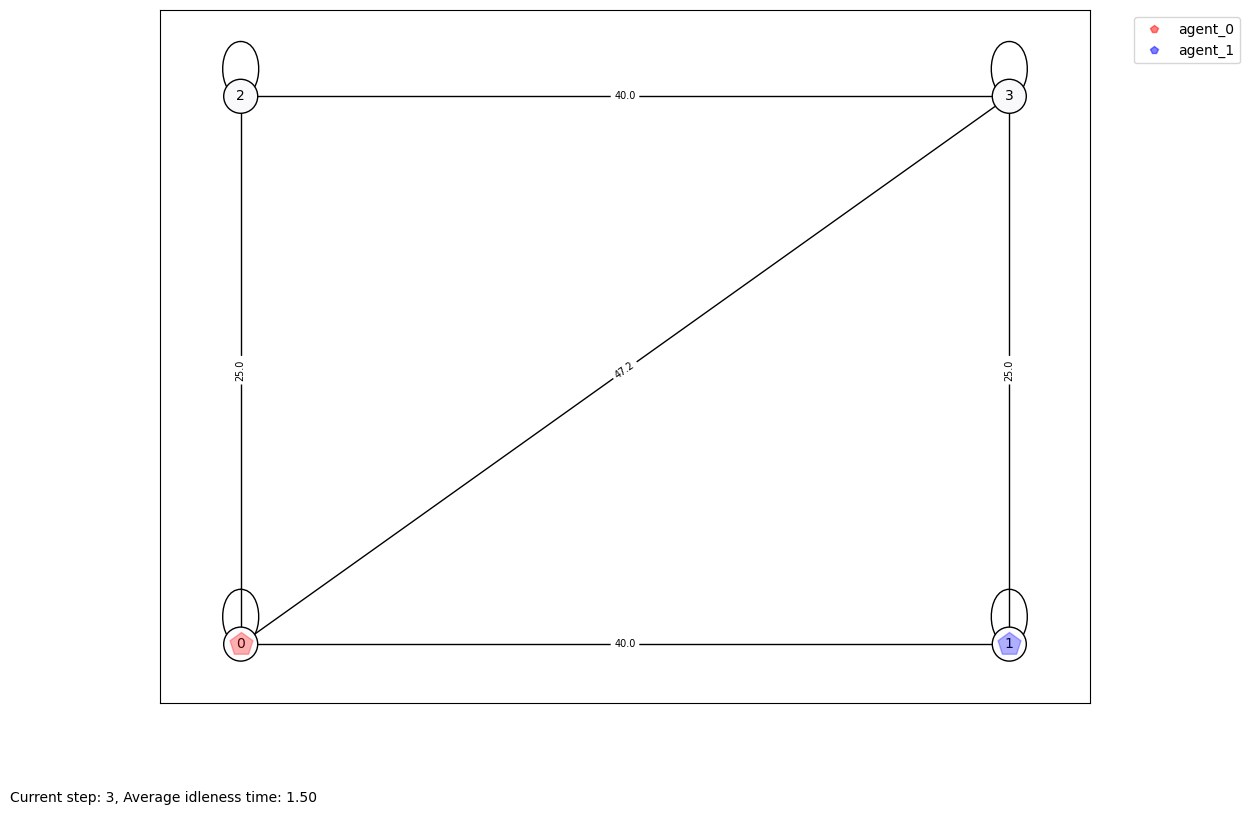

In [3]:
print(env.pg.graph.nodes, env.pg.graph.edges)
env.render()

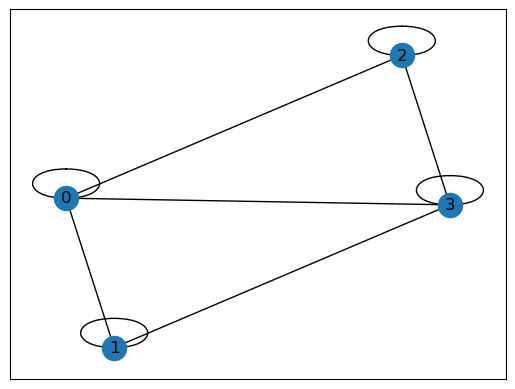

In [4]:
nx.draw_networkx(patrolGraph.graph)

In [5]:
bitmap = env.observe(env.agents[0], radius=200)

graphLayer = bitmap[:,:,2]
graphNodes = graphLayer[np.where(graphLayer >= 0)]
print(f"Sum of node layer: {np.sum(graphNodes)}")
print(f"Expected sum of node layer: {sum(list(range(len(patrolGraph.graph.nodes))))}")

agentLayer = bitmap[:,:,0]
agents = agentLayer[np.where(agentLayer >= 0)]

bitmap = env._minMaxNormalize(bitmap, a=0, b=255)
bitmap[np.where(graphLayer >= 0)] = 255
bitmap[np.where(agentLayer >= 0)] = 0
plt.imshow(bitmap, aspect="equal")

IndexError: too many indices for array: array is 1-dimensional, but 3 were indexed

{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7fcf30519f30>: {'ready': True}}
{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7fcf30519f30>: {'ready': False}, 'node_visits': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'avg_idleness': 1.0, 'stddev_idleness': 0.0, 'worst_idleness': 1.0, 'agent_count': 1}


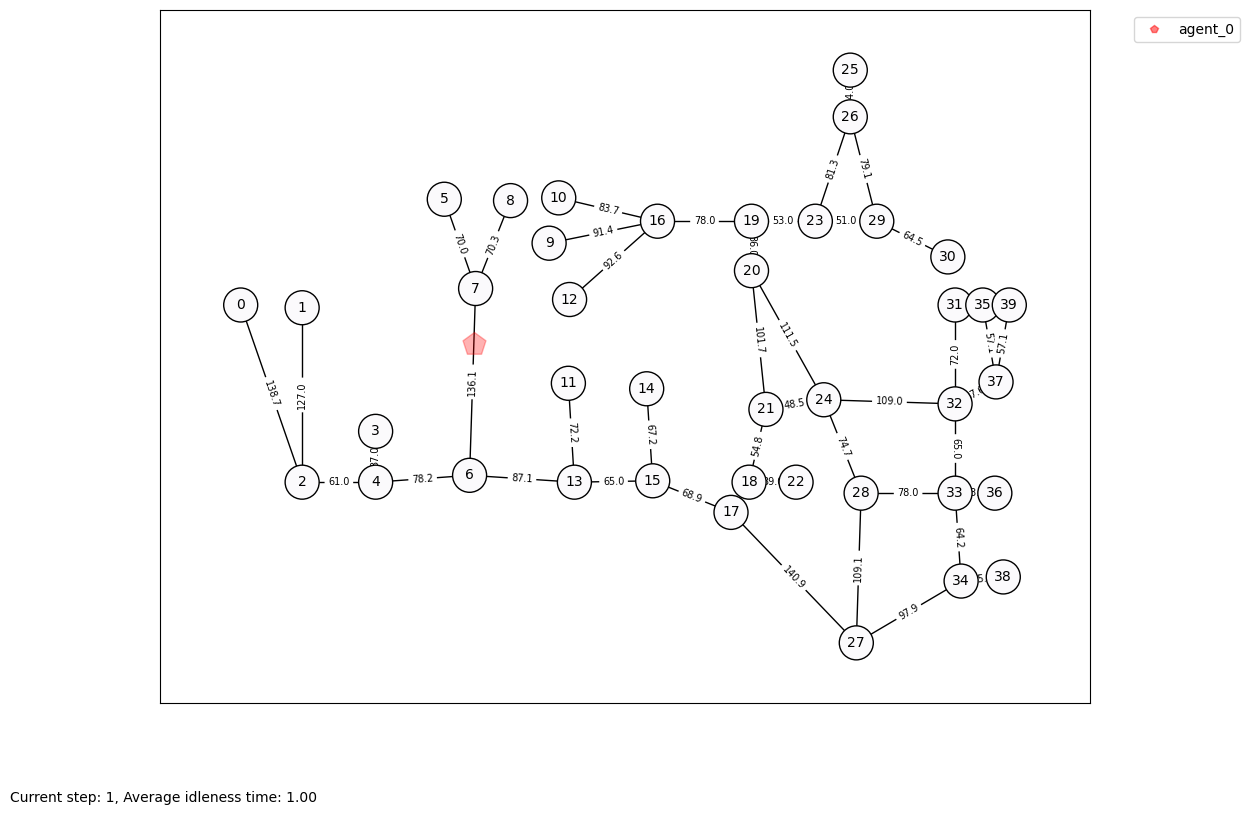

{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7fcf30519f30>: {'ready': False}, 'node_visits': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'avg_idleness': 2.0, 'stddev_idleness': 0.0, 'worst_idleness': 2.0, 'agent_count': 1}


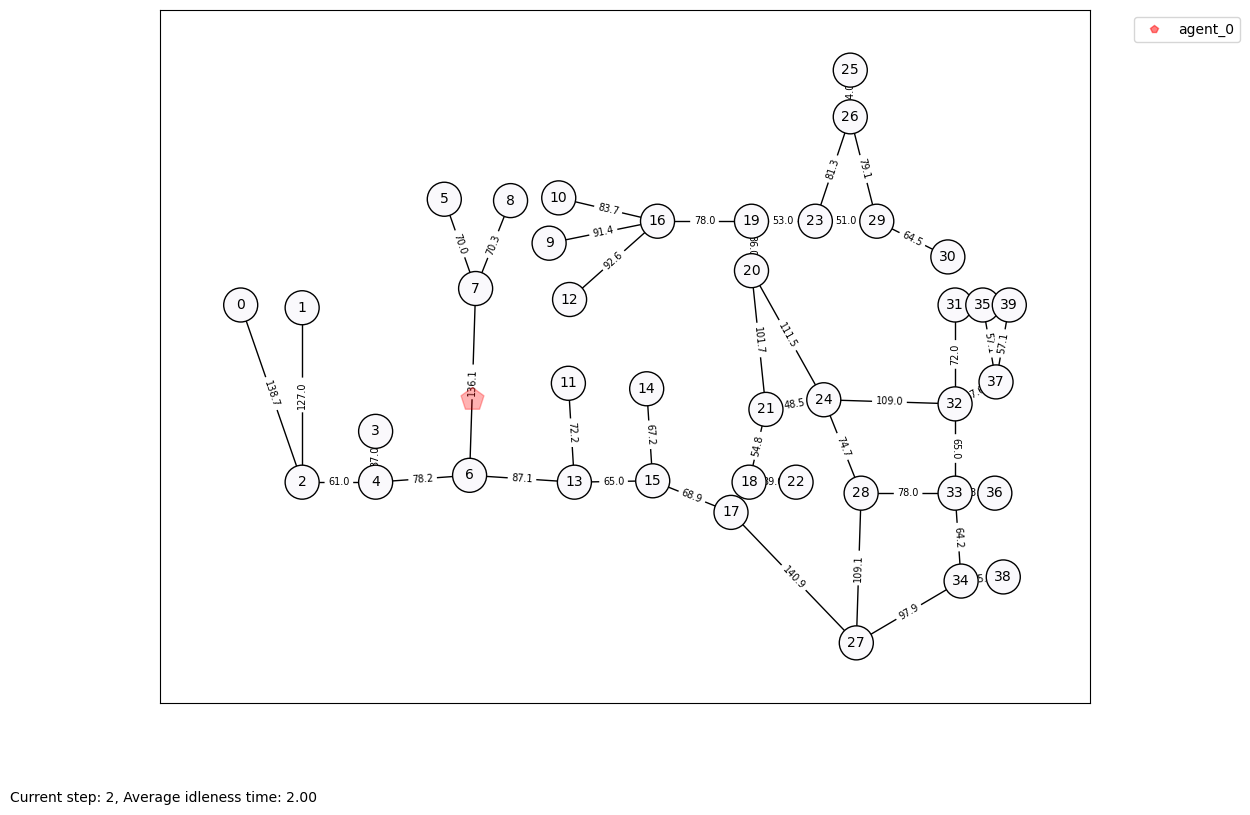

{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7fcf30519f30>: {'ready': False}, 'node_visits': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'avg_idleness': 3.0, 'stddev_idleness': 0.0, 'worst_idleness': 3.0, 'agent_count': 1}


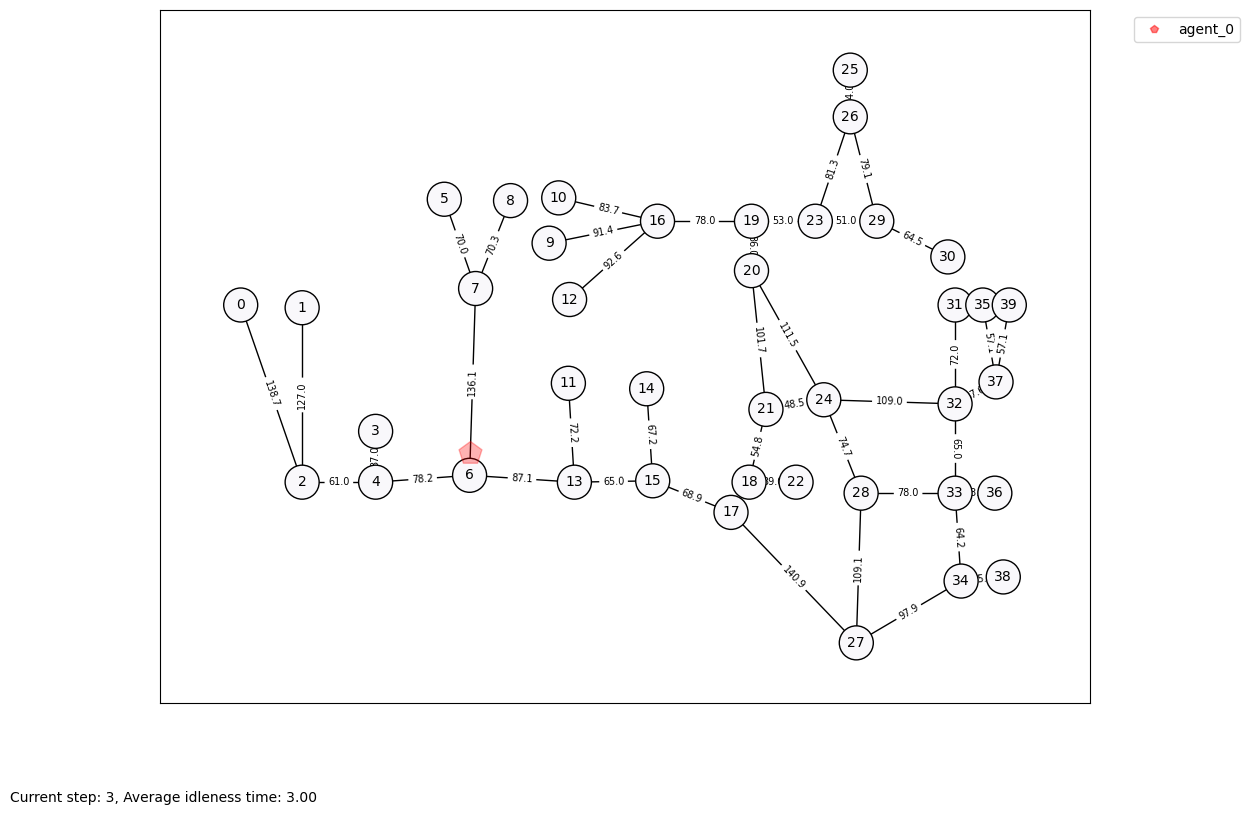

{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7fcf30519f30>: {'ready': True}, 'node_visits': array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'avg_idleness': 3.9, 'stddev_idleness': 0.6244997998398396, 'worst_idleness': 4.0, 'agent_count': 1}


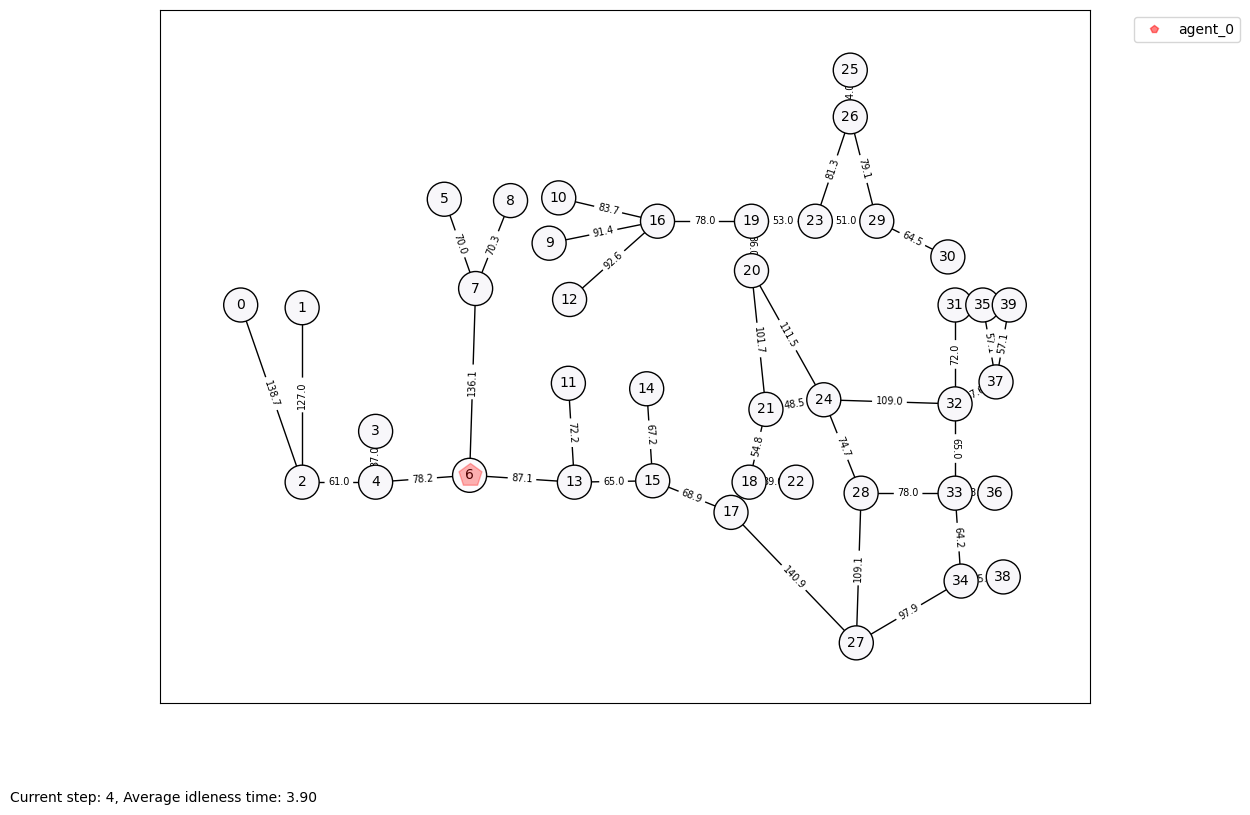

{<patrolling_zoo.env.patrolling_zoo.PatrolAgent object at 0x7fcf30519f30>: {'ready': True}, 'node_visits': array([0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0.]), 'avg_idleness': 4.875, 'stddev_idleness': 0.7806247497997998, 'worst_idleness': 5.0, 'agent_count': 1}


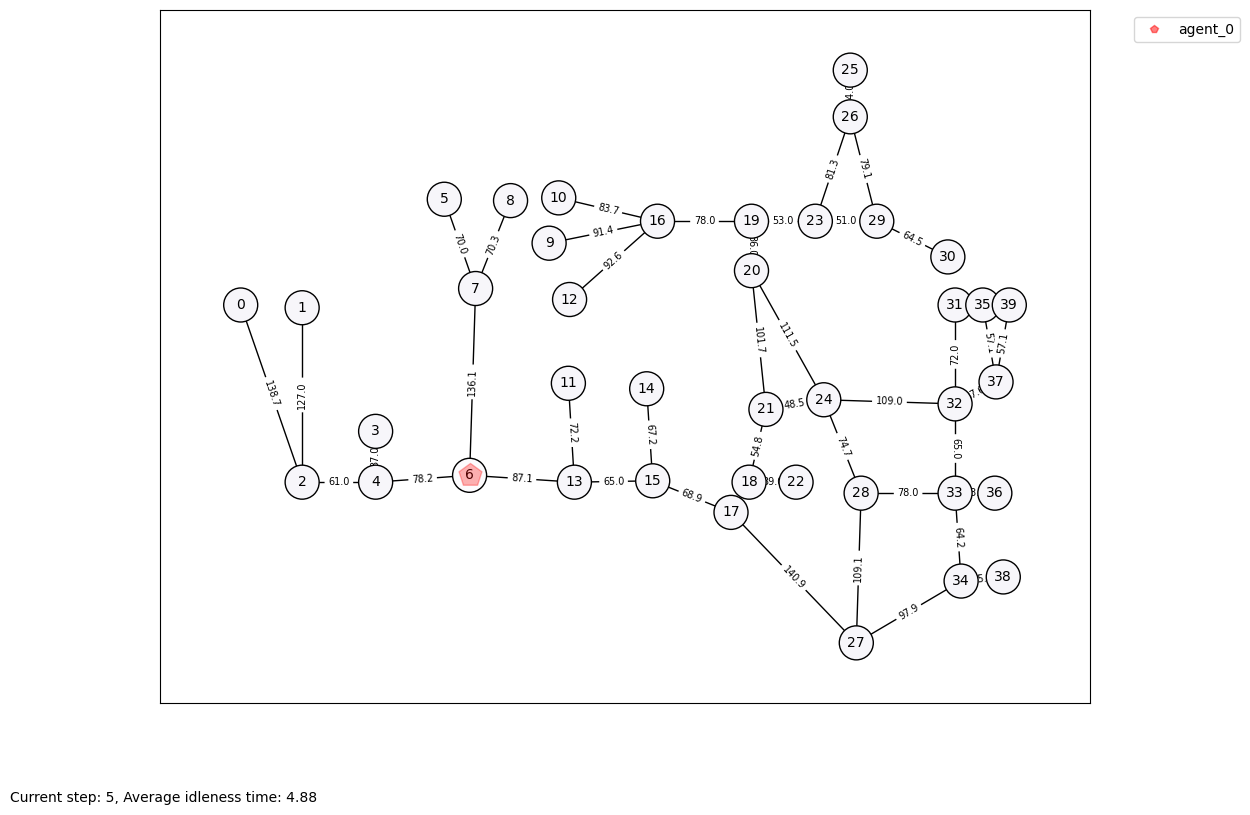

In [ ]:
%load_ext autoreload
%autoreload 2

from IPython.display import clear_output
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph
from patrolling_zoo.env.communication_model import CommunicationModel

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")
env = parallel_env(patrolGraph, 1,
                   speed = 40.0,
                #    observation_radius = 0,
                #    comms_model = CommunicationModel("bernoulli"),
                   require_explicit_visit=True
)

observations, infos = env.reset(seed=42)

print(infos)

# We temporarily fix the actions to a single node visit for each agent.
# actions = {agent: env.action_space(agent).sample() for agent in env.agents}
actions = {agent: 6 for agent in env.agents}

i = 0
while env.agents:
    # this is where you would insert your policy
    # actions = {agent: env.action_space(agent).sample() for agent in env.agents}
    
    observations, rewards, terminations, truncations, infos = env.step(actions)

    print(infos)

    # clear_output(wait=True)
    env.render()

    # actions = {agent: 0 for agent in env.agents}
    i += 1
    if i >= 5:
        break
env.close()

In [ ]:
from patrolling_zoo.patrolling_zoo_v0 import parallel_env, PatrolGraph

patrolGraph = PatrolGraph("patrolling_zoo/env/cumberland.graph")

pygGraph = patrolGraph.getPyTorchGeometricGraph()
print(pygGraph)
print(f"Graph has {pygGraph.num_nodes} nodes.")
print(pygGraph.get_tensor_size())